In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.read_csv('data/tvmarketing.csv')

In [3]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
advertising.shape

(200, 2)

In [7]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


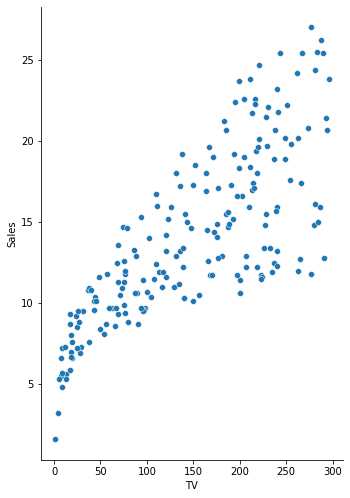

In [8]:
sns.pairplot(advertising,x_vars=['TV'],y_vars='Sales',height=7,aspect=.7,kind='scatter')
plt.show()

In [9]:
# y = c + m1 x TV

X = advertising['TV']
y = advertising['Sales']

In [10]:
# random state is the seed used the random number generator can be any integer

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=100)

In [11]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [12]:
# general convention sckit-learn observations are two wile features are column

X_train = np.array(X_train)[:,np.newaxis]
X_test = np.array(X_test)[:,np.newaxis]

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # class

lr.fit(X_train,y_train)

LinearRegression()

In [23]:
# coefficients Calculation
print(lr.intercept_)
print(lr.coef_)
# 6.98966 + 0.0464 x TV

6.98966585741168
[0.04649736]


In [16]:
# predictions
y_pred = lr.predict(X_test)
type(y_pred)

numpy.ndarray

Text(0, 0.5, 'Index')

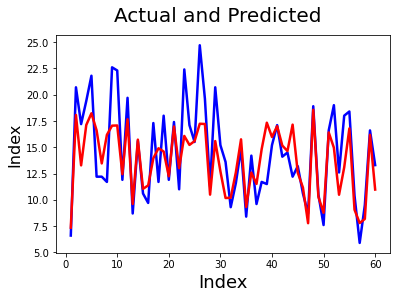

In [17]:
c = [i for  i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_pred,color='red',linewidth=2.5,linestyle='-')
fig.suptitle('Actual and Predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Index',fontsize=16)

Text(0, 0.5, 'Index')

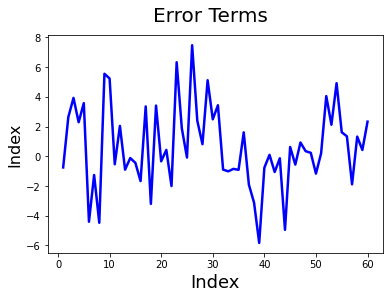

In [18]:
# ERROR terms
c = [i for  i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred,color='blue',linewidth=2.5,linestyle='-')
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Index',fontsize=16)

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)

In [20]:
r_squared = r2_score(y_test,y_pred)


In [21]:
print(mse)
print(r_squared)

7.975798532854851
0.5942987267783302


Text(0, 0.5, 'Predicted')

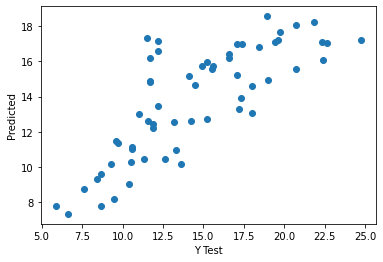

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted')


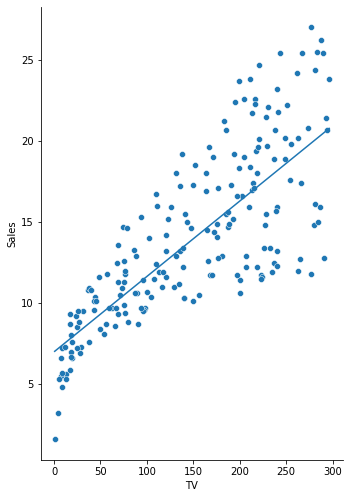

In [29]:
fun = lr.intercept_ + lr.coef_*X
dtt = pd.DataFrame({'x':X,'y':fun})
sns.pairplot(advertising,x_vars=['TV'],y_vars='Sales',height=7,aspect=.7,kind='scatter')
sns.lineplot(data=dtt,x='x',y='y')
plt.show()
